<h1>Statistical Analysis</h3>

<h2>Load Data</h2>

In [22]:
import pandas as pd

# Load data
file_path = './facial_expressions_with_grade_groups_with_eye_tracking_march_2024.csv'
facial_expression_data = df = pd.read_csv(file_path, low_memory=False)

facial_expression_data.head()

,Unnamed: 0,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade,Grade Group
0,1,36109.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
1,2,36236.000,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55
2,3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55
3,4,36270.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
4,5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55


In [23]:
import pandas as pd
import numpy as np

# Sorting by respondent and timestamp
facial_expression_data.sort_values(by=['Respondent', 'Timestamp'], inplace=True)

# Function to merge every two rows for a given respondent
def merge_two_rows(group):
    new_rows = []
    # Iterating over pairs of rows
    for i in range(0, len(group), 2):
        if i + 1 < len(group):  # Ensure there is a pair
            row1 = group.iloc[i]
            row2 = group.iloc[i + 1]
            merged_row = row1.combine_first(row2)  # Combine two rows, taking the first non-NaN value
            new_rows.append(merged_row)
        else:  # If an odd row is left without a pair, just take it as is
            new_rows.append(group.iloc[i])
    return pd.DataFrame(new_rows)

# Applying the function to each group
merged_data = facial_expression_data.groupby('Respondent', as_index=False).apply(merge_two_rows).reset_index(drop=True)

# Displaying some of the merged data
print(merged_data.head())


   Unnamed: 0  Timestamp     Anger  Contempt   Disgust      Fear       Joy  \
0           1  36109.900  0.125566  0.186393  0.023706  0.125796  0.025453   
1           3  36269.000  0.125833  0.186909  0.023738  0.126169  0.025312   
2           5  36301.000  0.126258  0.187818  0.023798  0.126605  0.025114   
3           7  36333.000  0.126290  0.188413  0.023834  0.126583  0.024996   
4           9  36371.192  0.126344  0.188792  0.023866  0.126641  0.024909   

    Sadness  Surprise  Engagement  ...  Fixation Dispersion  Saccade Duration  \
0  0.125512  0.055428    0.328766  ...                  NaN          887.4785   
1  0.125694  0.055510    0.328766  ...                  NaN          887.4785   
2  0.125970  0.055607    0.328766  ...                  NaN          887.4785   
3  0.126124  0.055529    0.328766  ...                  NaN          887.4785   
4  0.126202  0.055519    0.328766  ...                  NaN          887.4785   

   Saccade Amplitude  Saccade Peak Velocity 

In [26]:
merged_data.to_csv('./datasets/merged_data_march_10_2024.csv')

In [24]:
import pandas as pd

# Count rows with at least one NaN
rows_with_nan = merged_data.isnull().any(axis=1).sum()

print(f'Number of rows with at least one NaN: {rows_with_nan}')


Number of rows with at least one NaN: 625958


In [25]:
# Get the total number of rows
total_rows = merged_data.shape[0]

print(f'Total number of rows: {total_rows}')


Total number of rows: 630607


<h3>Grades Frequency<h3>

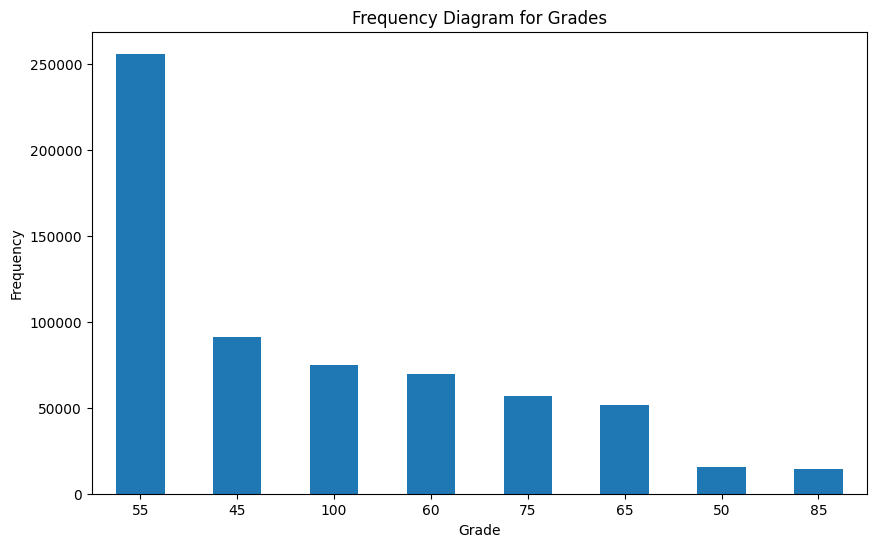

In [27]:
import matplotlib.pyplot as plt

# Count the frequency of each grade
grade_counts = merged_data['Grade'].value_counts()

# Plotting the frequency diagram (bar chart) for grades
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar')
plt.title('Frequency Diagram for Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the grade labels horizontal for readability
plt.show()

<h3>Frequency for 55 or Below and Above 55</h3>

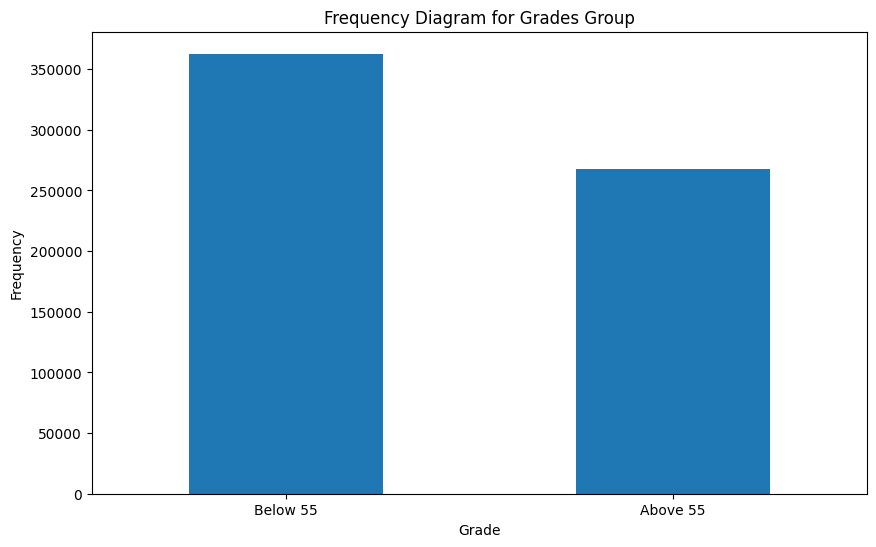

In [28]:
import matplotlib.pyplot as plt

# Count the frequency of each grade
grade_counts = merged_data['Grade Group'].value_counts()

# Plotting the frequency diagram (bar chart) for grades
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar')
plt.title('Frequency Diagram for Grades Group')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the grade labels horizontal for readability
plt.show()

<h3>Wilcoxon Test for Session Duration</h3>

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Calculate the count of data points for each respondent in each group
data_points_count = facial_expression_data.groupby(['Respondent', 'Grade Group']).size().reset_index(name='counts')

# Directly filter counts for each grade group
group1_counts = data_points_count[data_points_count['Grade Group'] == 'Below 55']['counts']
group2_counts = data_points_count[data_points_count['Grade Group'] == 'Above 55']['counts']

# Perform the Mann-Whitney U test for unpaired samples
u_statistic, p_value = mannwhitneyu(group1_counts, group2_counts)

print(f'U statistic: {u_statistic}, P-value: {p_value}')


U statistic: 41.0, P-value: 0.3822843822843822


<h5>There is no statistically significant difference in the session lengths between the two grade groups</h5>